In [1]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns

# displays plots in the notebook
%matplotlib inline

def read_frame(name: str) -> pd.DataFrame:
    return pd.read_csv('../data/preprocessed/' + name + '.csv', sep=';')

loans = read_frame('loan_dev')

In [2]:
cards = read_frame('card_dev')
cards

,card_id,disp_id,type,issued_year,issued_month,issued_day,issued_date
0,1005,9285,classic,1993,11,7,1993-11-07
1,104,588,classic,1994,1,19,1994-01-19
2,747,4915,classic,1994,2,5,1994-02-05
3,70,439,classic,1994,2,8,1994-02-08
4,577,3687,classic,1994,2,15,1994-02-15
...,...,...,...,...,...,...,...
172,243,1478,classic,1996,12,13,1996-12-13
173,162,967,junior,1996,12,23,1996-12-23
174,594,3794,junior,1996,12,27,1996-12-27
175,609,3893,classic,1996,12,29,1996-12-29


In [8]:
disps = read_frame('disp')

card_disps = pd.merge(cards, disps, how="left", on="disp_id")
loan_cards = pd.merge(loans, card_disps, how="inner", on="account_id")

loan_cards

,loan_id,account_id,amount,duration,payments,status,loan_year,loan_month,loan_day,loan_date,card_id,disp_id,type_x,issued_year,issued_month,issued_day,issued_date,client_id,type_y
0,6577,7753,51696,24,2154,1,1994,3,11,1994-03-11,1005,9285,classic,1993,11,7,1993-11-07,9593,owner
1,5595,3050,82896,12,6908,1,1994,9,2,1994-09-02,577,3687,classic,1994,2,15,1994-02-15,3687,owner
2,7243,11042,217152,36,6032,1,1995,12,4,1995-12-04,1225,13268,classic,1995,11,22,1995-11-22,13576,owner
3,5900,4503,135360,48,2820,1,1996,1,1,1996-01-01,783,5433,junior,1995,10,24,1995-10-24,5433,owner
4,6550,7614,320592,48,6679,1,1996,5,18,1996-05-18,989,9119,classic,1996,2,21,1996-02-21,9427,owner
5,5311,1766,30060,60,501,1,1996,6,15,1996-06-15,337,2141,classic,1996,1,1,1996-01-01,2141,owner
6,6992,9790,133968,48,2791,1,1996,7,27,1996-07-27,1134,11742,classic,1996,5,31,1996-05-31,12050,owner
7,7305,11359,54024,12,4502,1,1996,8,6,1996-08-06,1247,13660,classic,1995,6,13,1995-06-13,13968,owner
8,5088,544,91152,24,3798,1,1996,8,22,1996-08-22,119,655,classic,1996,8,8,1996-08-08,655,owner
9,7154,10520,417600,60,6960,1,1996,12,5,1996-12-05,1187,12635,gold,1996,7,17,1996-07-17,12943,owner


<AxesSubplot:>

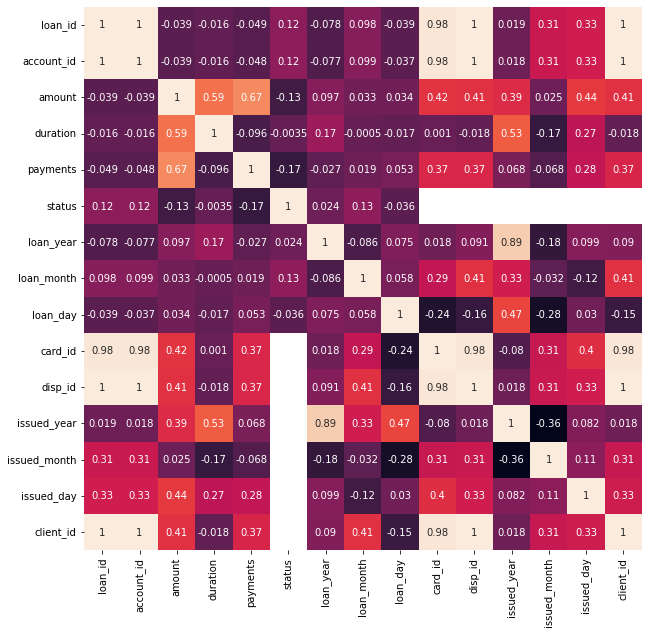

In [5]:
plt.figure(figsize=(10, 10))
sns.heatmap(loan_cards.corr(), annot=True, cbar=False)